## Analysis of the Dorothea dataset by Paul Trimble.
This notebook is my data analysis process applied to the Dorothea_smaller data set, initial data exploration has already been comducted, indicating a sparse binary dataset of a matrix of 800x10001, 

My first action is to import the libaries that are required throughout this analyisis, specifically pandas for data handling, 
numpy for basic mathmatical functions, 

In [2]:

from sklearn.decomposition import PCA as sklearnPCA

from sklearn import datasets
from sklearn import linear_model, svm, tree
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.pipeline as skpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline

I then upload the dataset, and spefically assign X,y for numbered row and (check)

In [3]:
data = pd.read_csv("Datasets/dorothea_smaller.csv")
X, y = data.iloc[:,0:-1], data.iloc[:,-1]

To perserve the integrity of the data, I perform a test data split, on a standardised 70/30 split genereated from a random selection. 
Test train split accessed via sklearn library. 

In [4]:
#perform test train split with a 30% ratio. Samples chosen randomly. Taken from Python for Data Science, Page 355 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=5)

I then look at the shape of the train split to confirm split. 

In [5]:
#show shape of test train split
print(X_train.shape, X_test.shape)

(560, 10001) (240, 10001)


In [6]:
#Show shape of test train splait
#print (y_train.shape, Y_test.shape)

I then create a new data set with the row numbers and drug discovery column removed. 

In [7]:
#remove first and last columns ie row numbers and indicator state y train. 
X_train1 = X_train.iloc[:,1:]

And look the the head of this dataset. 

In [8]:
X_train1.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 9991,Unnamed: 9992,Unnamed: 9993,Unnamed: 9994,Unnamed: 9995,Unnamed: 9996,Unnamed: 9997,Unnamed: 9998,Unnamed: 9999,Unnamed: 10000
564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Confirm removal of first and last columns
print(X_train1.shape)

(560, 10000)


##Principle Component Analysis, (PCA) Used for dimensionality Reduction.
Accessed via sklearn library. 
PCA code used from Multivariate notebook.

In [10]:
from sklearn import datasets, decomposition, cluster, linear_model

X_train_pca = decomposition.PCA(n_components=3)# create a pca
principalComponents = X_train_pca.fit_transform(X_train1) # fit the pca to this dataset
principalDf = pd.DataFrame(data = principalComponents)


I then look at the variance ratio compared to number of components, it seems most of the variance is contained within three components, with an order of magnitude drop in the forth componet. 

In [11]:
X_train_pca.explained_variance_ratio_

array([0.01433685, 0.01326232, 0.01152316])

In [12]:
np.shape(X_train_pca.components_)

(3, 10000)

I then look at the total amount of data retained by my selected number of components in the pca, although small, this seems to have little effect on the sucess of my model, implying only a few very dominant components. 

In [13]:
# variance captured
sum(X_train_pca.explained_variance_ratio_)

0.03912232389575988

I now create a space for the Linear regression to be stored to, and use the pipeline function to allow the linear regression to access the pca reduced data set. 
Pipeline function sourced from https://www.kaggle.com/stevebroll/logistic-regression-model-using-pca-components. 
Pipeline function appears to be required after error message that logisical regression could not be applied to a pca reduced data set, however pipeline function allows a LR to be imposed on the pca dataset. 

In [14]:
LR = linear_model.LogisticRegression() #Create logistic regression empty model space.
pipeline = skpl.Pipeline([('pca', X_train_pca), ('logreg', LR)]) #use pipeline function to impose model of logistical regression and apply this to chosen datasets, and be able to process between different data types.  
#Sourced via https://www.kaggle.com/stevebroll/logistic-regression-model-using-pca-components.
#More info here, https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

I now apply the pipeline function onto the training data set. 

In [15]:
pipeline.fit(X_train, y_train) # apply original data to model.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [16]:
pipeline.score(X_train, y_train)

0.9178571428571428

In [28]:
print('test samples:', len(y_train))
print('test samples shape:',X_train.shape)

test samples: 560
test samples shape: (560, 10001)


I then perform the same PCA on the test dataset and look to predict onto my test data. 

In [25]:
prediction = pipeline.predict(X_test) # Apply model to test data and predict Y data.
success = (prediction == Y_test) # Compare prediction to Y_test to determine if sucessful.

Y_test_pca = decomposition.PCA(n_components=3)
principalComponents = X_train_pca.fit_transform(X_test) 
principalDf_test = pd.DataFrame(data = principalComponents)
#print('principalDF shape', principalDf.shape)
#print(principalDf)

I then bring up all the active sections of Y-Test

In [42]:
Y_success_idx = [i for i, x in enumerate(success) if x]
Y_success_idx

print('length', len(Y_test))
Y_test[:,]

length 240


28    -1
654   -1
383   -1
648   -1
247   -1
628   -1
405   -1
258   -1
390   -1
322   -1
117   -1
742   -1
250   -1
123   -1
634   -1
267   -1
568   -1
151   -1
530   -1
518   -1
159   -1
331    1
342   -1
688   -1
355   -1
441   -1
12    -1
440   -1
726   -1
571   -1
      ..
578   -1
343   -1
50    -1
733   -1
796   -1
536   -1
434    1
605   -1
504   -1
286   -1
556   -1
149   -1
645   -1
129   -1
330   -1
651   -1
438   -1
417   -1
283   -1
325   -1
447   -1
580   -1
326   -1
366   -1
703   -1
53    -1
769   -1
138   -1
370   -1
349    1
Name: y.train, Length: 240, dtype: int64

Prediction score, slightly down from training data as to be expected. 

In [43]:
pipeline.score(X_test, Y_test)

0.8833333333333333

I then bring up all the shapes to check the numbers, we have 240 sucessful drugs indicated in Y, and 212 sucessfully predictions. 
212/240 = 0.883

In [44]:
print('success length: ', len(success))
print('sucess sum:', sum(success))
print('test samples:', len(Y_test))
print('test samples shape:',X_test.shape)
#print('sucess shape:', success)
print('y-test shape:', Y_test.shape)
print(principalDf_test.iloc[:,1].shape)

success length:  240
sucess sum: 212
test samples: 240
test samples shape: (240, 10001)
y-test shape: (240,)
(240,)


In [45]:
pipeline.score(X_train, y_train) #Sucessful prediction rate applied to training data and compared to Y_train list. 

0.9107142857142857

In [46]:
pipeline.score(X_test, Y_test) #Sucessful prediction rate applied to test data and compared to Y_train list.  

0.8833333333333333

I then plot some of the data, the 240 Y_train positions.

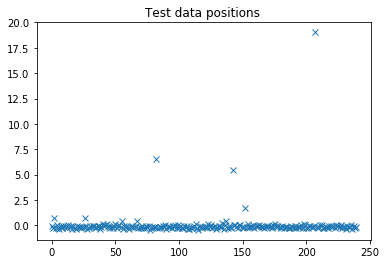

In [120]:
plt.title("Test data positions ")
plt.plot(principalDf_test.iloc[:,1], 'x')
plt.show()


And now the predictions positions. 

<function matplotlib.pyplot.show(*args, **kw)>

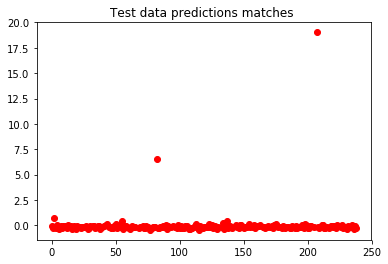

In [125]:
plt.title("Test data predictions matches ")
plt.plot(principalDf_test.iloc[Y_success_idx,1], 'or')
plt.show

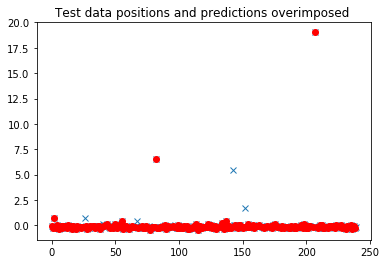

In [128]:
plt.title("Test data positions and predictions overimposed ")
plt.plot(principalDf_test.iloc[:,1], 'x')
plt.plot(principalDf_test.iloc[Y_success_idx,1], 'or')
plt.show()

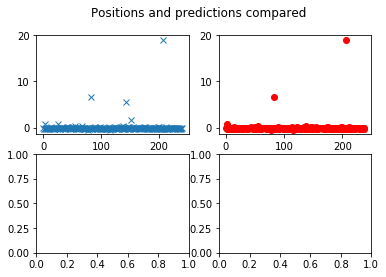

In [127]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.suptitle('Positions and predictions compared')
ax1.plot(principalDf_test.iloc[:,1], 'x')
ax2.plot(principalDf_test.iloc[Y_success_idx,1], 'or')
